In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
datadir = '/home/xavier/data/'
# datadir = '~/Documents/data/genetic-cpt/'
fname = 'Medicare_National_HCPCS_Aggregate_Summary_Table_CY2016.csv'

# Summary Pivot Table - Genetic codes used as of 2016

+ Original file here: [download link](https://data.cms.gov/Medicare-Physician-Supplier/Medicare-National-HCPCS-Aggregate-Summary-Table-CY/jtra-d83c)

In [3]:
allcpt = pd.read_csv(datadir + fname)

In [5]:
list(allcpt)

['HCPCS Code',
 'HCPCS Description',
 'HCPCS Drug Indicator',
 'Place of Service',
 'Number of Providers',
 'Number of Services',
 'Number of Unique Beneficiary/Provider Interactions',
 'Number of Distinct Medicare Beneficiary/Per Day Services',
 'Average Submitted Charge Amount',
 'Average Medicare Allowed Amount',
 'Average Medicare Payment Amount',
 'Average Medicare Standardized Payment Amount']

In [31]:
gene = allcpt[allcpt['HCPCS Description'].str.contains(r'\bgene\b', case = False, regex = True)]
gene.shape

(80, 12)

In [32]:
genetic = allcpt[allcpt['HCPCS Description'].str.contains(r'\bgenetic\b', case = False, regex = True)]
genetic.shape

(54, 12)

In [45]:
genes = allcpt[allcpt['HCPCS Description'].str.contains(r'\bgenes\b', case = False, regex = True)]
genes.shape

(13, 12)

In [49]:
genomicsearchterms = [r'\bgene\b',r'\bgenetic\b',r'\bgenes\b']

In [50]:
gencpt = allcpt[allcpt['HCPCS Description'].str.contains('|'.join(genomicsearchterms), case = False, regex = True)]
gencpt.shape

(147, 12)

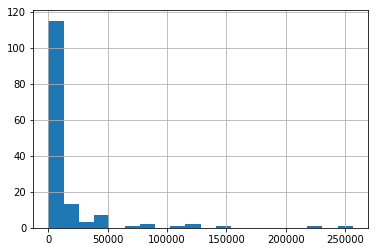

In [57]:
hist = gencpt['Number of Services'].hist(bins=20)

/home/xavier/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


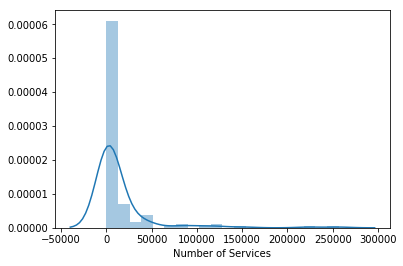

In [56]:
sns.distplot(gencpt['Number of Services'], bins = 20)

In [41]:
competitors = sunshine[
    sunshine["Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"]
    .str.contains('jardiance|farxiga', case = False, na=False)]

NameError: name 'sunshine' is not defined

In [12]:
competitors.shape

(52681, 75)

In [22]:
pd.pivot_table(competitors,index=["Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"],values=["Total_Amount_of_Payment_USDollars"],aggfunc=np.sum)

,Total_Amount_of_Payment_USDollars
Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,
FARXIGA,10228074.89
JARDIANCE,1208126.93


# ...⇧
| FINDING: Farxiga spent 10.2M, Jardiance spend $1.2M

In [21]:
pd.pivot_table(competitors,index=["Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1","Form_of_Payment_or_Transfer_of_Value","Nature_of_Payment_or_Transfer_of_Value"],values=["Total_Amount_of_Payment_USDollars"],aggfunc=np.sum)

Total_Amount_of_Payment_USDollars
Name_of_Drug_or_Biological_or_Device_or_Medical... Form_of_Payment_or_Transfer_of_Value Nature_of_Payment_or_Transfer_of_Value                                               
FARXIGA                                            Cash or cash equivalent              Compensation for services other than consulting...                         6807950.00
                                                                                        Consulting Fee                                                              151271.29
                                                   In-kind items and services           Education                                                                      607.08
                                                                                        Food and Beverage                                                          2788519.07
                                                                                        Travel and Lodging                                                          479727.45
JARDIANCE                                          Cash or cash equivalent              Compensation for services other than consulting...                          164950.00
                                                                                        Consulting Fee                                                              270256.25
                                                                                        Food and Beverage                                                              136.10
                                                                                        Space rental or facility fees(teaching hospital...                             750.00
                                                                                        Travel and Lodging                                                             389.17
                                                   In-kind items and services           Compensation for services other than consulting...                           71233.06
                                                                                        Education                                                                     2386.82
                                                                                        Food and Beverage                                                           660510.45
                                                                                        Travel and Lodging                                                           37515.08

# ...⇧
| FINDING: Farxiga spent 6.8M on 'Med Ed' type activities, while Jardiance spend $164K

In [13]:
jardiance = sunshine[sunshine["Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"] == "JARDIANCE"]

In [11]:
jardiance["Product_Category_or_Therapeutic_Area_1"].unique()

array(['Diabetes', 'DIABETES'], dtype=object)

In [26]:
farxiga = sunshine[sunshine["Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"] == "FARXIGA"]

In [14]:
farxiga["Product_Category_or_Therapeutic_Area_1"].unique()

array(['CARDIOVASCULAR AND METABOLISM',
       'CARDIOVASCULAR AND METABOLISM,RESPIRATORY',
       'Cardiovascular and Metabolism',
       'CARDIOVASCULAR AND METABOLISM,RESPIRATORY,NEUROSCIENCE',
       'CARDIOVASCULAR AND METABOLISM,NEUROSCIENCE,RESPIRATORY',
       'CARDIOVASCULAR AND METABOLISM,NEUROSCIENCE',
       'Cardiovascular and Metabolism,Respiratory',
       'CARDIOVASCULAR AND METABOLISM,ONCOLOGY',
       'CARDIOVASCULAR AND METABOLISM,ONCOLOGY,RESPIRATORY'], dtype=object)

# ...⇧
| ANOMALY: Why does Farxiga place against these categories above, when Jardiance only shows up against Diabetes. 